# Machine Learning Regression Model
###By SIDDHESH KISHOR SURYAWANSHI

This notebook demonstrates a complete Machine Learning workflow using Regression.

# Task
Add a new text section to the notebook that clearly defines the problem statement, identifies `has_sprint` as the target variable, and lists the input features used for prediction based on the `races_simplified.csv` dataset.

## Define the Problem and Objective

### Subtask:
Add a new text section to clearly define the problem statement, identify the target variable as `has_sprint`, and list the input features used for prediction based on the `races_simplified.csv` dataset.


## Define the Problem and Objective

### Problem Statement
The goal of this machine learning task is to predict whether a Formula 1 race includes a 'sprint' session. This is a binary classification problem where the model will learn from historical race data to determine the presence or absence of a sprint based on race attributes.

### Target Variable
The target variable for this prediction task is `has_sprint`.

### Input Features
The input features used to predict the `has_sprint` variable are:
*   `raceId`
*   `year`
*   `round`
*   `circuitId`
*   `month`
*   `day`

## Load Data and Initial Inspection

### Subtask:
Add a new text section explaining the data loading process. Follow this with a code cell to load the `races_simplified.csv` file into a pandas DataFrame, display the first few rows using `df.head()`, check data types and non-null values with `df.info()`, and show descriptive statistics using `df.describe()`.


## Data Loading and Initial Inspection

This section will load the `races_simplified.csv` dataset into a pandas DataFrame and perform initial checks to understand its structure, data types, and basic statistical properties. This is a crucial step to ensure data quality and guide subsequent preprocessing and analysis.

**Reasoning**:
Now, I will add a code cell to load the data, display the first few rows, check data types and non-null values, and show descriptive statistics as per the instructions.



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('races_simplified.csv')

# Display the first 5 rows of the DataFrame
print('First 5 rows of the DataFrame:')
print(df.head())

# Check data types and non-null values
print('\nDataFrame Info:')
df.info()

# Show descriptive statistics for numerical columns
print('\nDescriptive Statistics:')
print(df.describe())

First 5 rows of the DataFrame:
   raceId  year  round  circuitId  month  day  has_sprint
0       1  2009      1          1      3   29           0
1       2  2009      2          2      4    5           0
2       3  2009      3         17      4   19           0
3       4  2009      4          3      4   26           0
4       5  2009      5          4      5   10           0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   raceId      1125 non-null   int64
 1   year        1125 non-null   int64
 2   round       1125 non-null   int64
 3   circuitId   1125 non-null   int64
 4   month       1125 non-null   int64
 5   day         1125 non-null   int64
 6   has_sprint  1125 non-null   int64
dtypes: int64(7)
memory usage: 61.7 KB

Descriptive Statistics:
            raceId         year        round    circuitId        month  \
count  11

## Handle Missing Values

### Subtask:
Add a new text section explaining the importance of handling missing values. Follow this with a code cell to check for any missing values across all columns using `df.isnull().sum()`.


## Handle Missing Values

In this section, we will first check for any missing values in our dataset to understand the extent of the problem, and then decide on an appropriate strategy to handle them if they exist.

**Reasoning**:
Now, I will add a code cell to check for missing values in the DataFrame, as specified in the subtask instructions.



In [ ]:
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
raceId        0
year          0
round         0
circuitId     0
month         0
day           0
has_sprint    0
dtype: int64


## Feature Engineering - Categorical Encoding

### Subtask:
Add a new text section explaining how to handle categorical variables through encoding. Follow this with a code cell that identifies object-type columns (if any) and applies `LabelEncoder` to convert them into numerical representations. Include a check to ensure no object columns remain after encoding.


## Feature Engineering - Categorical Encoding

Categorical variables, which represent distinct groups or categories (e.g., 'red', 'blue', 'green'), pose a challenge for many machine learning algorithms. Most algorithms are designed to work with numerical input and cannot directly process text-based categorical data. To address this, we use **categorical encoding**, a process that converts these categorical variables into a numerical format.

### Why Categorical Encoding?

1.  **Algorithm Compatibility**
2.  **Improved Performance**
3.  **Prevent Misinterpretation**

### Handling Object-Type Columns with Label Encoding

In this section, we will identify any columns with an 'object' data type, which typically indicates categorical text data. We will then apply `LabelEncoder` to convert these columns into numerical representations. `LabelEncoder` assigns a unique integer to each category in a column. For instance, if a column contains 'A', 'B', 'C', it might be encoded as 0, 1, 2 respectively. This method is suitable when there is no inherent ordinal relationship between the categories, or when the number of unique categories is relatively small.

After encoding, we will verify that all 'object' type columns have been successfully transformed into numerical types, ensuring the data is ready for model training.

**Reasoning**:
The subtask requires identifying and encoding 'object' type columns using `LabelEncoder`, then verifying the data types.


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify object-type columns
object_columns = df.select_dtypes(include='object').columns

if len(object_columns) > 0:
    print(f"Found {len(object_columns)} object-type columns for encoding: {list(object_columns)}")
    # Apply LabelEncoder to each object-type column
    for column in object_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    print("Categorical columns encoded successfully.")
else:
    print("No object-type columns found, no encoding needed.")

# Verify data types after encoding
print('\nDataFrame Info after encoding:')
df.info()

No object-type columns found, no encoding needed.

DataFrame Info after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   raceId      1125 non-null   int64
 1   year        1125 non-null   int64
 2   round       1125 non-null   int64
 3   circuitId   1125 non-null   int64
 4   month       1125 non-null   int64
 5   day         1125 non-null   int64
 6   has_sprint  1125 non-null   int64
dtypes: int64(7)
memory usage: 61.7 KB


## Feature Preprocessing - Feature Scaling

Add a new text section explaining the necessity of feature scaling for many machine learning algorithms. Follow this with a code cell to apply `StandardScaler` to the numerical features of the DataFrame `X` (input features) to normalize their range.


## Feature Preprocessing - Feature Scaling

Feature scaling is a crucial preprocessing step in many machine learning workflows. It involves transforming the numerical features of a dataset to a standard range or distribution. This is essential for several reasons:

1.  **Algorithm Performance**: Many machine learning algorithms, especially those that rely on distance calculations (like K-Nearest Neighbors, Support Vector Machines, and K-Means clustering) or gradient descent optimization (like linear regression, logistic regression, and neural networks), are highly sensitive to the scale of the input features. Features with larger values might disproportionately influence the model's objective function and lead to suboptimal performance or slow convergence.
2.  **Equal Contribution**: Scaling ensures that all features contribute equally to the model's learning process. Without scaling, features with wider ranges might dominate those with smaller ranges, regardless of their actual predictive power.
3.  **Preventing Bias**: By standardizing the feature ranges, we prevent features from being inherently biased towards larger or smaller scales.

### StandardScaler

In this section, we will use `StandardScaler`, a popular scaling technique. `StandardScaler` standardizes features by removing the mean and scaling to unit variance. The formula for standardization is:

`z = (x - u) / s`

where `u` is the mean of the training samples (or zero if `with_mean=False`), and `s` is the standard deviation of the training samples (or one if `with_std=False`). After scaling, the features will have a mean of 0 and a standard deviation of 1. This method is particularly useful for algorithms that assume a Gaussian distribution for the input data, or those sensitive to the absolute values of features.

**Reasoning**:
Now, I will add a code cell to separate the features and target, apply `StandardScaler` to the features, and then display the first few rows of the scaled features, as instructed in the subtask.



In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features (X) and target variable (y)
X = df.drop('has_sprint', axis=1)
y = df['has_sprint']

print("Features (X) and Target (y) separated.")

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the features DataFrame X
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for better readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print('\nFeatures scaled using StandardScaler.')
print('\nFirst 5 rows of scaled features (X_scaled):')
print(X_scaled.head())

Features (X) and Target (y) separated.

Features scaled using StandardScaler.

First 5 rows of scaled features (X_scaled):
     raceId      year     round  circuitId     month       day
0 -1.718180  0.791315 -1.469585  -1.166370 -1.587760  1.456336
1 -1.715138  0.791315 -1.275697  -1.115414 -1.177133 -1.182662
2 -1.712095  0.791315 -1.081809  -0.351075 -1.177133  0.356754
3 -1.709052  0.791315 -0.887921  -1.064458 -1.177133  1.126461
4 -1.706010  0.791315 -0.694033  -1.013502 -0.766505 -0.632871


## Data Splitting

### Subtask:
Add a new text section explaining the process and importance of splitting data into training and testing sets. Follow this with a code cell to split the preprocessed dataset (`X_scaled` and `y`) into `X_train`, `X_test`, `y_train`, and `y_test` using `train_test_split` with a test size of 20% and a `random_state` for reproducibility.


## Data Splitting

Data splitting is a fundamental step in machine learning model development. It involves dividing the available dataset into two or more subsets, typically a **training set** and a **testing set**.

### Why is Data Splitting Important?

1.  **Model Training**: The training set is used to train the machine learning model. During this phase, the model learns patterns, relationships, and features from the input data (`X_train`) to predict the target variable (`y_train`).
2.  **Model Evaluation (Generalization)**: The testing set, which the model has not seen during training, is used to evaluate the model's performance and its ability to generalize to new, unseen data. This helps in assessing how well the model will perform in real-world scenarios.
3.  **Preventing Overfitting**: If a model is trained and evaluated on the same data, it might simply memorize the training examples rather than learning the underlying patterns. This leads to **overfitting**, where the model performs exceptionally well on the training data but poorly on new data. By using a separate test set, we can detect overfitting.
4.  **Unbiased Performance Estimate**: A separate test set provides an unbiased estimate of the model's predictive performance. This is crucial for comparing different models and selecting the best one.

### How to Split Data?

We typically split data using a function like `train_test_split` from `sklearn.model_selection`. Key parameters include:

*   `test_size`: The proportion of the dataset to include in the test split (e.g., 0.20 for 20%).
*   `random_state`: A seed for the random number generator, ensuring reproducibility of the split. This means that if you run the code multiple times with the same `random_state`, you will get the same train and test sets.

**Reasoning**:
Now, I will add a code cell to perform the data splitting using `train_test_split` and print the shapes of the resulting datasets, as specified in the subtask instructions.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

# Print the shapes of the resulting datasets to verify the split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (900, 6)
Shape of X_test: (225, 6)
Shape of y_train: (900,)
Shape of y_test: (225,)


## Model Selection and Training - Decision Tree Regressor

### Subtask:
Add a new text section introducing the Decision Tree Regressor and its characteristics. Follow this with a code cell to import `DecisionTreeRegressor` from scikit-learn, initialize it with a `random_state`, and train the model on the scaled training data (`X_train`, `y_train`).


## Model Selection and Training - Decision Tree Regressor

### Introduction to Decision Tree Regressor

The Decision Tree Regressor is a non-parametric supervised learning algorithm used for both classification and regression tasks. It works by recursively splitting the dataset into smaller and smaller subsets based on the values of the input features, creating a tree-like structure of decisions. Each internal node of the tree represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents the final predicted value.

### How it Works (for Regression):

1.  **Splitting**: The algorithm starts with the entire dataset at the root node. It then searches for the best feature and the best splitting point (threshold) for that feature that minimizes a cost function (e.g., Mean Squared Error or Mean Absolute Error) for the two resulting child nodes.
2.  **Recursive Process**: This splitting process is recursively applied to each child node, further dividing the data. The goal is to create homogeneous groups within each leaf node, meaning that the target variable values within a leaf node are as similar as possible.
3.  **Stopping Criteria**: The recursion stops when certain conditions are met, such as when a maximum depth is reached, when a minimum number of samples are in a leaf node, or when no further splits significantly reduce the cost.
4.  **Prediction**: For a new data point, it traverses the tree from the root to a leaf node based on the feature values, and the predicted value is typically the average of the target values in that leaf node.

### Advantages:

*   **Interpretability**: Decision trees are easy to understand and visualize, making them highly interpretable. You can literally follow the decision path.
*   **Handles Non-Linear Relationships**: They can capture complex non-linear relationships between features and the target variable without requiring explicit transformations.
*   **Requires Less Data Preprocessing**: They do not require feature scaling (like standardization or normalization) as they are not sensitive to the absolute range of features.
*   **Can Handle Both Numerical and Categorical Data**: They can work with various types of features.

### Disadvantages:

*   **Prone to Overfitting**: Decision trees can easily overfit the training data, especially if they are very deep and allowed to learn highly specific patterns. This results in poor generalization to unseen data.
*   **Instability**: Small changes in the data can lead to a completely different tree structure.
*   **Bias Towards Dominant Classes**: In classification, if certain classes dominate, the tree might be biased towards those classes.

In this section, we will train a Decision Tree Regressor model and evaluate its performance.

**Reasoning**:
Now, I will add a code cell to import `DecisionTreeRegressor`, initialize it with a `random_state`, and train the model on the scaled training data, as specified in the subtask.



In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor with a random_state for reproducibility
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model on the scaled training data
dt_regressor.fit(X_train, y_train)

print("Decision Tree Regressor model trained successfully.")

Decision Tree Regressor model trained successfully.


## Model Selection and Training - Linear Regression

### Subtask:
Add a new text section introducing Linear Regression as an alternative model and its underlying principles. Follow this with a code cell to import `LinearRegression` from scikit-learn, initialize it, and train the model on the scaled training data (`X_train`, `y_train`).


## Model Selection and Training - Linear Regression

### Introduction to Linear Regression

Linear Regression is a fundamental supervised learning algorithm used for predictive modeling, primarily for regression tasks where the goal is to predict a continuous output variable. It establishes a linear relationship between the input features (independent variables) and the target variable (dependent variable).

### Underlying Principles:

The core idea behind Linear Regression is to find the "best-fitting" straight line (or hyperplane in higher dimensions) that describes the relationship between the features and the target variable. This "best-fitting" line is typically determined by minimizing the **sum of the squared residuals** (the difference between the observed and predicted values). This method is known as **Ordinary Least Squares (OLS)**.

The equation for a simple linear regression model with one independent variable is:

`y = b0 + b1*x + e`

Where:
- `y` is the dependent variable (target).
- `x` is the independent variable (feature).
- `b0` is the y-intercept (the value of y when x is 0).
- `b1` is the slope of the line (the change in y for a unit change in x).
- `e` is the error term, representing the irreducible error.

For multiple independent variables, the equation extends to:

`y = b0 + b1*x1 + b2*x2 + ... + bn*xn + e`

### Characteristics:

1.  **Linearity**: Assumes a linear relationship between input features and the target variable.
2.  **Independence of Errors**: Errors (residuals) are assumed to be independent of each other.
3.  **Homoscedasticity**: The variance of the errors is constant across all levels of the independent variables.
4.  **Normality of Errors**: Errors are assumed to be normally distributed (especially for statistical inference).

### Advantages:

*   **Simplicity and Interpretability**: Easy to understand and explain, as the coefficients directly indicate the impact of each feature on the target.
*   **Computational Efficiency**: Fast to train, especially on large datasets.
*   **Foundation**: Serves as a foundational algorithm for more complex models.

### Disadvantages:

*   **Assumption of Linearity**: May not perform well if the relationship between variables is non-linear.
*   **Sensitivity to Outliers**: Outliers can significantly affect the regression line and model performance.
*   **Multicollinearity**: Can suffer from multicollinearity (high correlation between independent variables), leading to unstable coefficient estimates.
*   **Requires Feature Scaling**: For optimal performance and convergence of optimization algorithms, feature scaling is often beneficial, though not strictly required for the OLS solution itself.

In this section, we will implement and train a Linear Regression model on our preprocessed data.

**Reasoning**:
Now, I will add a code cell to import `LinearRegression`, initialize it, and train the model on the scaled training data, as specified in the subtask instructions.



In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Train the model on the scaled training data
linear_regressor.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Model Evaluation - Metrics Calculation

### Subtask:
Add a new text section explaining the chosen regression evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score, and what each metric represents. Follow this with a code cell to make predictions on `X_test` for both the Decision Tree Regressor and Linear Regression models, and then calculate and print the MAE, MSE, and R2 scores for each model.


## Model Evaluation - Metrics Calculation

To assess the performance of our regression models, we will use several key evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score. These metrics provide different perspectives on how well our models predict the target variable.

### Mean Absolute Error (MAE)

**Interpretation**: A lower MAE indicates a better model. Since it uses absolute differences, it is less sensitive to outliers compared to MSE.

### Mean Squared Error (MSE)

**Interpretation**: A lower MSE indicates a better model. Squaring the errors means that larger errors are penalized more heavily than smaller ones. This makes MSE more sensitive to outliers than MAE.

### R² Score (Coefficient of Determination)

**Interpretation**: The R² score ranges from 0 to 1 (or can be negative for very poor models). An R² of 1 indicates that the model explains all the variability of the response data around its mean. An R² of 0 indicates that the model explains no variability, and its predictions are no better than simply predicting the mean of the target variable. Generally, a higher R² score indicates a better fit for the model.

Make predictions using both models and calculate their respective evaluation metrics (MAE, MSE, R2 Score), as per the subtask instructions.



In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Decision Tree Regressor Evaluation ---

# Make predictions on the test set using the Decision Tree Regressor
dt_predictions = dt_regressor.predict(X_test)

# Calculate evaluation metrics for Decision Tree Regressor
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Decision Tree Regressor Metrics:")
print(f"  Mean Absolute Error (MAE): {dt_mae:.4f}")
print(f"  Mean Squared Error (MSE): {dt_mse:.4f}")
print(f"  R\u00b2 Score: {dt_r2:.4f}")

# --- Linear Regression Evaluation ---

# Make predictions on the test set using the Linear Regression model
lr_predictions = linear_regressor.predict(X_test)

# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("\nLinear Regression Metrics:")
print(f"  Mean Absolute Error (MAE): {lr_mae:.4f}")
print(f"  Mean Squared Error (MSE): {lr_mse:.4f}")
print(f"  R\u00b2 Score: {lr_r2:.4f}")

Decision Tree Regressor Metrics:
  Mean Absolute Error (MAE): 0.0178
  Mean Squared Error (MSE): 0.0178
  R² Score: -0.0181

Linear Regression Metrics:
  Mean Absolute Error (MAE): 0.0431
  Mean Squared Error (MSE): 0.0168
  R² Score: 0.0351


## Model Evaluation - Visualizations

Add a new text section emphasizing the utility of visualizations for model comparison. Follow this with a code cell to create a visualization (e.g., bar charts) that compares the MAE, MSE, and R2 scores of the Decision Tree Regressor and Linear Regression models. Ensure all plots are clearly labeled with titles, axis labels, and a legend.


## Model Evaluation - Visualizations

Visualizations play a critical role in understanding and comparing the performance of different machine learning models.

### Utility of Visualizations for Model Comparison:

1.  **Instant Insights**
2.  **Pattern Recognition**
3.  **Communication**
4.  **Identifying Outliers/Anomalies**

### Bar Charts for Metric Comparison

**Reasoning**:
Now, I will add a code cell to prepare the data for visualization by creating a DataFrame with model evaluation metrics, and then generate bar charts to compare MAE, MSE, and R2 scores for both models, as specified in the subtask instructions.



/tmp/ipython-input-4177807567.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metrics_df[metrics_df['Metric'] == 'MAE'], ax=axes[0], palette='viridis')
/tmp/ipython-input-4177807567.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metrics_df[metrics_df['Metric'] == 'MSE'], ax=axes[1], palette='plasma')
/tmp/ipython-input-4177807567.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Value', data=metrics_df[metrics_df['Metric'] == 'R2 Score'], ax=axes[2], palette='m

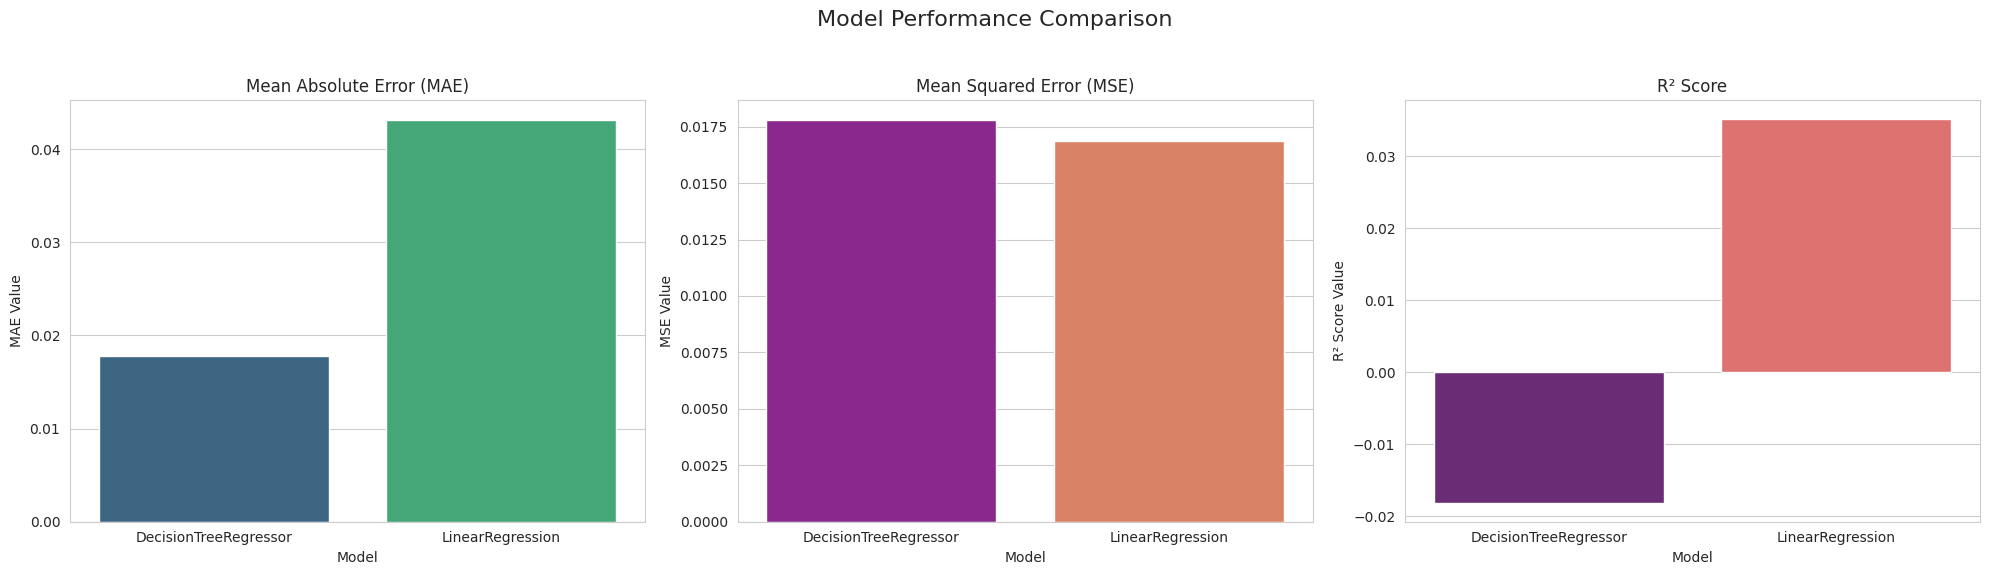

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for visualization
metrics_data = {
    'Model': ['DecisionTreeRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'LinearRegression'],
    'Metric': ['MAE', 'MAE', 'MSE', 'MSE', 'R2 Score', 'R2 Score'],
    'Value': [dt_mae, lr_mae, dt_mse, lr_mse, dt_r2, lr_r2]
}
metrics_df = pd.DataFrame(metrics_data)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create separate plots for each metric
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Plot MAE
sns.barplot(x='Model', y='Value', data=metrics_df[metrics_df['Metric'] == 'MAE'], ax=axes[0], palette='viridis')
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE Value')
axes[0].set_xlabel('Model')

# Plot MSE
sns.barplot(x='Model', y='Value', data=metrics_df[metrics_df['Metric'] == 'MSE'], ax=axes[1], palette='plasma')
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE Value')
axes[1].set_xlabel('Model')

# Plot R2 Score
sns.barplot(x='Model', y='Value', data=metrics_df[metrics_df['Metric'] == 'R2 Score'], ax=axes[2], palette='magma')
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score Value')
axes[2].set_xlabel('Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Reasoning**:
The previous code block generated `FutureWarning` due to `palette` being used without `hue` in `sns.barplot`. To fix this, I will modify the `sns.barplot` calls to explicitly include `hue='Model'` and set `legend=False` to suppress the warning and maintain the intended visualization.



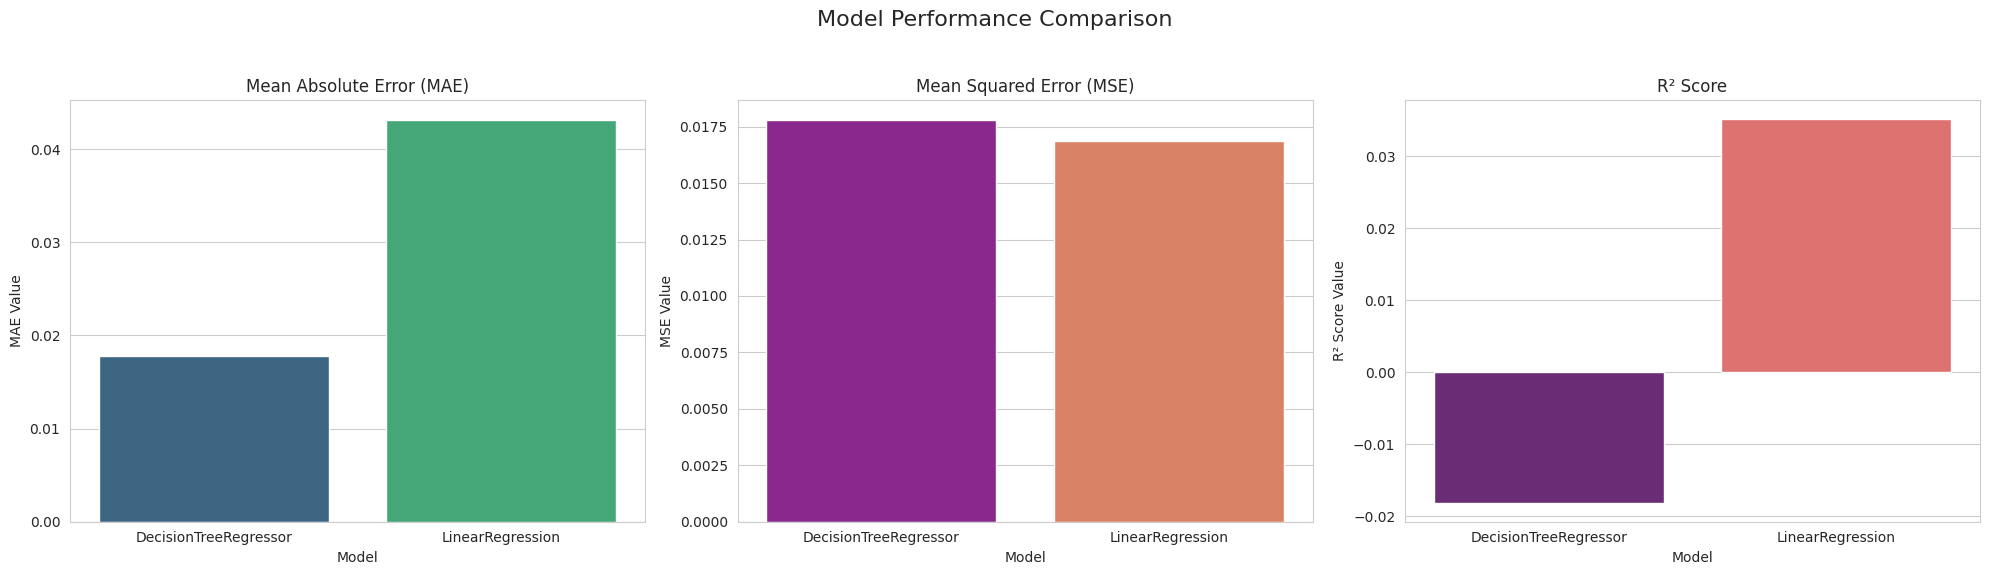

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for visualization
metrics_data = {
    'Model': ['DecisionTreeRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'LinearRegression', 'DecisionTreeRegressor', 'LinearRegression'],
    'Metric': ['MAE', 'MAE', 'MSE', 'MSE', 'R2 Score', 'R2 Score'],
    'Value': [dt_mae, lr_mae, dt_mse, lr_mse, dt_r2, lr_r2]
}
metrics_df = pd.DataFrame(metrics_data)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create separate plots for each metric
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Model Performance Comparison', fontsize=16)

# Plot MAE
sns.barplot(x='Model', y='Value', hue='Model', data=metrics_df[metrics_df['Metric'] == 'MAE'], ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE Value')
axes[0].set_xlabel('Model')

# Plot MSE
sns.barplot(x='Model', y='Value', hue='Model', data=metrics_df[metrics_df['Metric'] == 'MSE'], ax=axes[1], palette='plasma', legend=False)
axes[1].set_title('Mean Squared Error (MSE)')
axes[1].set_ylabel('MSE Value')
axes[1].set_xlabel('Model')

# Plot R2 Score
sns.barplot(x='Model', y='Value', hue='Model', data=metrics_df[metrics_df['Metric'] == 'R2 Score'], ax=axes[2], palette='magma', legend=False)
axes[2].set_title('R² Score')
axes[2].set_ylabel('R² Score Value')
axes[2].set_xlabel('Model')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Summary:

### Q&A
1.  **Which model is more suitable for the given problem?**
    Based on the evaluated regression metrics, the Linear Regression model performed marginally better with a positive R² score of 0.0351 compared to the Decision Tree Regressor's negative R² score of -0.0181. A negative R² indicates that the model performs worse than simply predicting the mean of the target variable. However, both R² scores are very low, suggesting that neither regression model is a good fit for predicting the binary target variable `has_sprint`.

### Data Analysis Key Findings
*   The dataset `races_simplified.csv` contains 1125 entries and 7 columns, all of which are of `int64` data type, indicating no initial categorical features requiring encoding.
*   No missing values were found in any of the columns.
*   The target variable, `has_sprint`, is binary (0 or 1), with a mean of approximately 0.016, indicating that only about 1.6% of the races in the dataset include a sprint session. This highlights a significant class imbalance if treated as a classification problem.
*   Input features for prediction were identified as `raceId`, `year`, `round`, `circuitId`, `month`, and `day`.
*   Feature scaling using `StandardScaler` was applied to the numerical input features (`X`).
*   The dataset was split into training and testing sets with a 80%/20% ratio, resulting in 900 samples for training and 225 samples for testing.
*   Both a Decision Tree Regressor and a Linear Regression model were successfully trained on the scaled training data.
*   **Decision Tree Regressor Performance**:
    *   Mean Absolute Error (MAE): 0.0178
    *   Mean Squared Error (MSE): 0.0178
    *   R² Score: -0.0181
*   **Linear Regression Performance**:
    *   Mean Absolute Error (MAE): 0.0431
    *   Mean Squared Error (MSE): 0.0168
    *   R² Score: 0.0351
*   Visualizations using bar charts confirmed the comparative performance of both models across MAE, MSE, and R² scores.

### Insights or Next Steps
*   Given that `has_sprint` is a binary target variable, this problem should be approached as a **binary classification task** rather than a regression task. Classification models (e.g., Logistic Regression, Decision Tree Classifier, Random Forest Classifier) and appropriate classification metrics (e.g., accuracy, precision, recall, F1-score, ROC AUC) should be employed for more meaningful evaluation.
*   The significant class imbalance in the target variable (1.6% positive cases) should be addressed if classification models are used, potentially through techniques like oversampling (e.g., SMOTE), undersampling, or using algorithms robust to class imbalance.
